<a href="https://colab.research.google.com/github/rodrigo-calovi/CSI-SIEM/blob/master/Masterclass_CV_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masterclass Introdução à Visão Computacional - Aula 03

<p align="center"><img src="https://miro.medium.com/max/3200/0*7s3HcYYvpnUhzDkG.png" width="60%"></p>

## Filtros

Seguindo a nossa trilha de aprendizado de Visão Computacional com Python e OpenCV, chegamos aos filtros.

Já se perguntou como são manipuladas, no background, as imagens que editamos com filtros em redes sociais como o Instagram? Como vimos antes, podemos manipular os pixels e alterar imagens, e uma das formas que podemos fazer isso é com filtros.

Esse é o tema dessa aula.

## Filtros e Operações Aritméticas

O filtro na verdade é uma pequena matriz que usamos para deixar a imagem mais nítida ou borrada, por exemplo. Para fazer isso, precisamos fazer uma operação de convolução.

Vamos ver, na prática o que seria uma convolução, em termos simples. 

Por exemplo, temos uma matriz de 6x6 pixels que repesenta nossa imagem. O próximo passo é fazer uma operação de convolução com filtro 3x3. O produto final desse processo de convolução será uma matriz 4x4. Nós calculamos os elementos da matriz inicial (imagem) e pegamos o produto de cada elemento correspondente e os juntamos, como você pode ver abaixo.

<p align="center"><img src="http://media5.datahacker.rs/2018/10/multiplication_obojeno_new-1024x370.png" width="60%"></p>

<p align="center"><img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif" width="30%"></p>

Após avaliar a e excpressão acima nós obtemos o resulto de -5. Esse será o valor do pixel naquela posição na nossa imagem com o filtro aplicado. Então, nós vamos movendo o filtro ao longo da imagem e vamos criando a imagem pronta.

Note que o nosso filtro é uma matriz com a mesma altura e largura (3×3, 5×5, 9×9). Sempre usamos números ímparespois precisamos ter um pixel ao centro dessa matriz.

Agora que temos uma intuição de como a matriz funciona, vamos ver ela em ação na prática.


In [ ]:
# importando os pacotes necessários
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

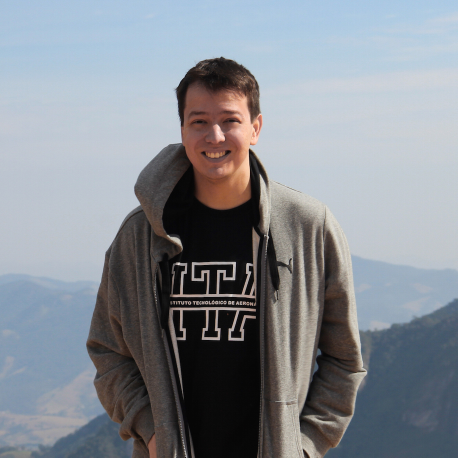

In [ ]:
# lendo a imagem
image = cv2.imread("carlos.jpg", cv2.IMREAD_REDUCED_COLOR_2)
cv2_imshow(image)

Como vimos na aula anterior, é possível transformar nossas imagens RGB (ou BGR) para Grayscale. Isso pode ser útil em várias situações quando lidamos com Visão Computacional, e pode ser feito facilmente, como mostramos no código abaixo.

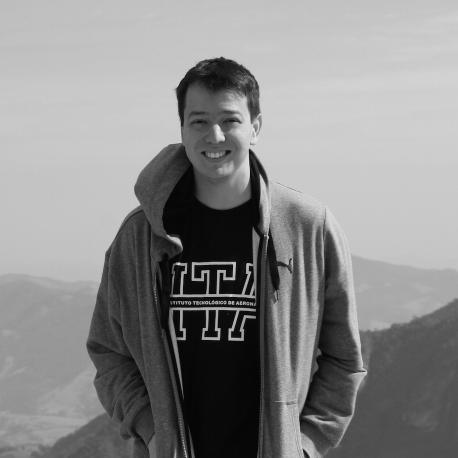

In [ ]:
# converter RGB - Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

### Blurring
Nas operações acima, nós estávamos tratando apenas de um canal, o que não é o mais comum quando lidamos com imagens, que normalmente estão no padrão **RGB** (Red, Blue, Green). Por isso, precisamos de outra forma de lidar com essas imagens.

Quando pensamos em canais como sendo uma "visão" da imagem como um todo, dando ênfase ou escondendo determinadas partes de acordo com as características de cada canal.


<p align="center"><img src="https://miro.medium.com/max/1000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg" width="70%"></p>

Por isso, uma distinção de termos se faz chave aqui: quando falamos de 1 canal, os termos filtro e kernel são praticamente intercambiáveis, mas em geral, quando falamos de mais canais, eles são bem diferentes. 

Cada filtro, na verdade, é uma coleção de kernels, havendo um kernel para cada canal de input para a camada, e cada kernel sendo único. Cada filtro em uma camada convolucional produz um e apenas um canal de output, e eles o fazem assim:

<p align="center"><img src="https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="70%"></p>

Cada um dos kernels do filtro "anda" por cima de seu respectivo canal de input, produzindo uma versão processada de cada um. É importante lembrar que alguns kernels podem ter pesos mais fortes que outros, o que resultaria em ênfases em determinados canais, ou um canal ser mais sensível a mudanças que outros.

<p align="center"><img src="https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="70%"></p>

Então, cada uma das versões processadas por cada canal são somadas, formando um canal único. Os kernels de um filtro produzem uma versão para cada canal, e o filtro, como um todo, produz um canal como output.

<p align="center"><img src="https://miro.medium.com/max/294/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="30%"></p>

Por fim, temos um *bias*, ou um viés, peso. A forma que o *bias* funciona é que cada output de filtro possui um viés. Esse viés é adicionado ao canal obtido como output até agora e produz o output final do canal.

Portanto, quando falamos em qualquer número de filtros, a forma de trabalho será idêntica: Cada filtro processa o input por si só, juntamos diferentes conjuntos de kernels com um viés através do processo descrito acima, produzindo um canal de output único. Então, eles são concatenados para produzir um output geral final, com o número de canais sendo o número de filtros. Normalmente, também é aplicada uma não-linearidade passando esse input por outra camada de convolução, o que repete o processo.

### Gaussian Blur

Outra forma de aplicar um *blur*, um embaçado na nossa imagem, seria o ***Gaussian Blur***. Esse filtro é um pouco mais complexo, mas é o tipo de kernel mais usado para processamento de imagens.

Para a criação desse filtro nós usamos a **Função Gaussiana**. Essa função representa a probabilidade de eventos serem centrdos ao redor do valor da média. Além disso, o desvio padrão (𝜎) dessa função controla quão ampla será essa distribuição. Ao tirar amostras de valores dessa função, nós consguirmos coeficientes para uma matriz de filtragem Gaussiana. O efeito de diferentes desvios padrão podem ser observados nas imagens a seguir.

<p align="center"><img src="http://media5.datahacker.rs/2020/05/image5.png" width="50%" ></p>
<center> Imagem 2D</center>

<p align="center"><img src="http://media5.datahacker.rs/2020/04/OIWce-768x576.png" width="50%" ></p>
<center> Imagem 3D</center>

Abaixo, criamos um filtro utilizando a técnica do Gaussian Blur.

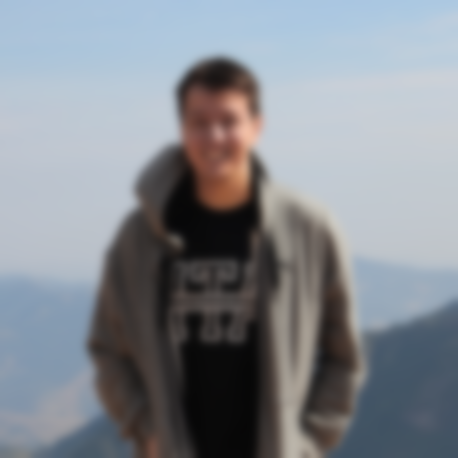

In [ ]:
# criar efeito blur na minha imagem
blur_image = cv2.GaussianBlur(image, (27, 27), 0)
cv2_imshow(blur_image)

### Filtros do Instagram

Agora que temos um amplo arsenal de ferramentas para manipular imagens com o OpenCV, já conseguimos entender como são feitos filtros prontos para imagens nas mais diversas plataformas, desde coisas mais simples como um filtro Sépia para o Instagram, até manipulações de imagens mais pesadas em programas como o Adobe Photoshop.

Abaixo, vamos ver como pode ser criado um filtro de Instagram usando OpenCV. O código original pode ser encontrado [aqui](http://datahacker.rs/004-how-to-smooth-and-sharpen-an-image-in-opencv/).

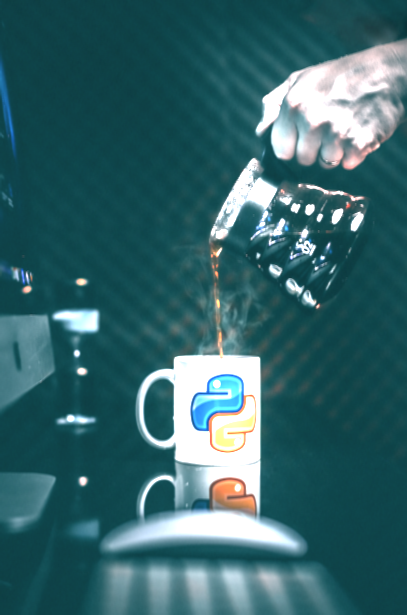

In [ ]:
# filtro de Sépia
cafe = cv2.imread("cafe.png", cv2.IMREAD_REDUCED_COLOR_2)
kernel = np.array([[0.272, 0.534, 0.131],
                   [0.349, 0.686, 0.168],
                   [0.393, 0.769, 0.189]])
sepia_image = cv2.filter2D(cafe, -1, kernel)
cv2_imshow(sepia_image)

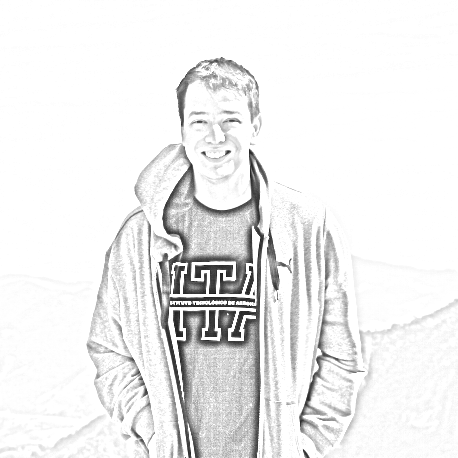

In [ ]:
# criar Sketch

# etapa 1
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray_image)

# etapa 2
inv_gray_image = 255 - gray_image
# cv2_imshow(inv_gray_image)

# etapa 3
blur_image = cv2.GaussianBlur(inv_gray_image, (21, 21), 0, 0)
# cv2_imshow(blur_image)

# etapa 4
sketch_image = cv2.divide(gray_image, 255 - blur_image, scale=256)
cv2_imshow(sketch_image)

### Canny Edges
Canny Edge Detection é um algortimo de detecção de bordas bastante popular, que tem implementação dentro do OpenCV.

O Canny Edges é um algoritmo multi-estágio, e esses estágios incluem:

* Redução de ruídos
* Busca pelo Gradiente de Intensidade da imagem
* Supressão de Não-Máximos
* Thresholding de Histerese

O OpenCV coloca todos os passos acima em uma única função: `cv2.Canny()`.

Para ver mais detalhes técnicos sobre essa função, recomandamos a leitura da [documentação oficial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html).

Abaixo, vamos ver ele em ação.

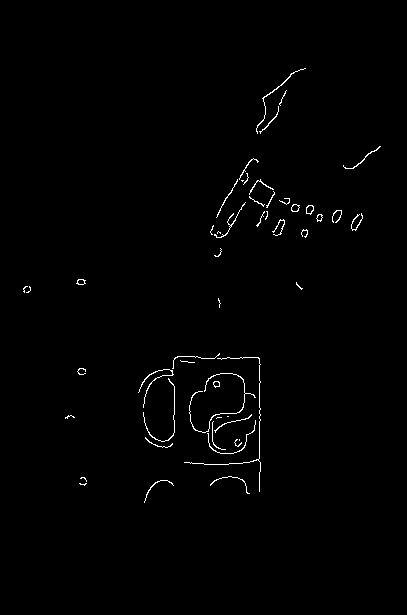

In [ ]:
# Canny
blur_image = cv2.GaussianBlur(image, (11, 11), 0)
canny_image = cv2.Canny(blur_image, 100, 150)
cv2_imshow(canny_image)